In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# importation du jeu de donées des profils 
df = pd.read_csv("./projet/labels/labels.csv")
df.head(5)

,Unnamed: 0,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225


,Unnamed: 0,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225


Effectuons une première ACP en gardant tous les composants

In [5]:
from sklearn.preprocessing import StandardScaler

# Normaliser les
X = df.iloc[:,1:]
X_cr = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_cr)
X.head(5)

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225


Affichage et représentation des valeurs propres de cette première ACP afin de déterminer les composants à retenir

Variances expliquées:
[3.07920625e+00 2.72183343e+00 1.59956869e+00 1.34599012e+00
 9.61070516e-01 9.02199483e-01 5.77756851e-01 3.23281702e-01
 2.58405597e-01 1.61023535e-01 4.99099723e-02 1.97603654e-02
 5.16109929e-35 1.54979799e-35]


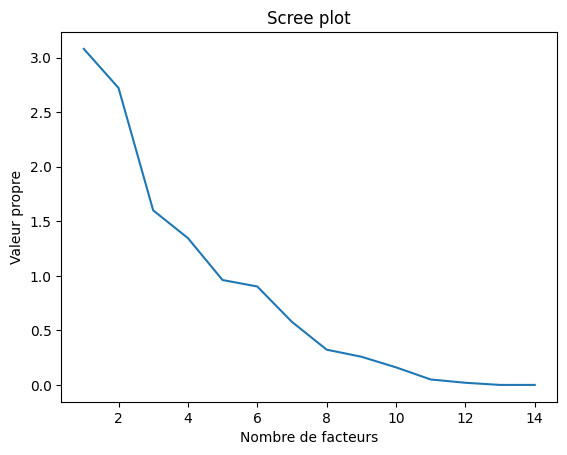

In [6]:
print("Variances expliquées:")
print(pca.explained_variance_)

# ajustement de variance pour avoir la variance avec le degré de liberté ayant la même valeur que le nombre de variables
eigenvalues = pca.explained_variance_*(len(X_cr)-1)/len(X_cr)
n = pca.n_components_
plt.plot(np.arange(1,n+1),eigenvalues)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Nombre de facteurs")
plt.show()

Nous gardons 3 composants principaux pour une analyse plus optimale et pertinente selon le critère de coude.
Nous refaisons l'ACP en gardant les 3 premières composants principaux.

In [8]:
pca = PCA(n_components=3)
coord = pca.fit_transform(X_cr)

Puis nous importons les étiquettes obtenues manuellement de 3000 premières lignes

In [9]:
dy1= pd.read_csv("./projet/labels/labels 0 - 1000.csv")
dy2 = pd.read_excel('./projet/labels/labels1000-2000.xlsx')
dy3 = pd.read_csv("./projet/labels/label2001-3000.csv")
d1  = dy1.iloc[:1001, -1]
d2 = dy2.iloc[:, -1]
d3 = dy3.iloc[:1001, -1]
y = pd.concat([d1, d2, d3], ignore_index= True)

# vérification des étiquettes manquantes
print("Existe-il des étiquettes manquantes? :")
print(np.any(np.isnan(y)))

Existe-il des étiquettes manquantes? :
False


Nous créons les coordonnées des 3000 premières lignes pour la classification

In [10]:
data = pd.DataFrame(coord, columns=["Composant1", "Composant2","Composant3"])
X = data.iloc[:3000,:]
data.head(5)

,Composant1,Composant2,Composant3
0,0.388590,-0.002151,0.093511
1,-0.379867,-0.003257,-0.008721
2,-0.530494,-0.002621,2.347067
3,-0.415253,-0.003143,1.187292
4,0.005275,-0.003489,-0.900516


In [11]:
# récupération des datasets et des étiquettes à entrainer, ainsi que ceux de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [12]:
# transformation en type dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Et puis nous effectuons la classification SVM après l'ACP

In [13]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instancier le classifier avec default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8922


In [14]:
X_to_classify = data.iloc[3000:,:]
y_to_predict = svc.predict(X_to_classify)

In [15]:
data_classified = pd.DataFrame(data, columns=X.columns)
y_total = np.hstack([y_train, y_test, y_to_predict])
data_classified["label"] = y_total

print("Profils classifiés:")
print(data_classified.head(5))
print(f"Nombre de profils atypes: ", len(np.where(data_classified["label"]==-1)[0]))
print(f"Nombre de profils normals: ", len(np.where(data_classified["label"]==1)[0]))

Profils classifiés:
   Composant1  Composant2  Composant3  label
0    0.388590   -0.002151    0.093511    1.0
1   -0.379867   -0.003257   -0.008721    1.0
2   -0.530494   -0.002621    2.347067    1.0
3   -0.415253   -0.003143    1.187292    1.0
4    0.005275   -0.003489   -0.900516    1.0
Nombre de profils atypes:  62170
Nombre de profils normals:  1781269


Nous allons visualiser les données obtenues ci-dessus

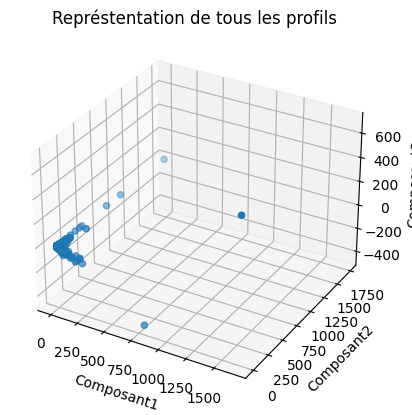

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_classified[data_classified["label"] == 1]['Composant1'], data_classified[data_classified["label"] == 1]['Composant2'], data_classified[data_classified["label"] == 1]['Composant3'], color='red')
ax.scatter(data_classified[data_classified["label"] == -1]['Composant1'], data_classified[data_classified["label"] == -1]['Composant2'], data_classified[data_classified["label"] == -1]['Composant3'])
plt.title("Représtentation de tous les profils")
ax.set_xlabel('Composant1')
ax.set_ylabel('Composant2')
ax.set_zlabel('Composant3')
plt.show()

Voyons que les données ne sont pas bien représentées: les profils atypiques ne sont pas présentées.

Nous refaisons la représentation en se consentrant sur les 100 miles premières lignes.

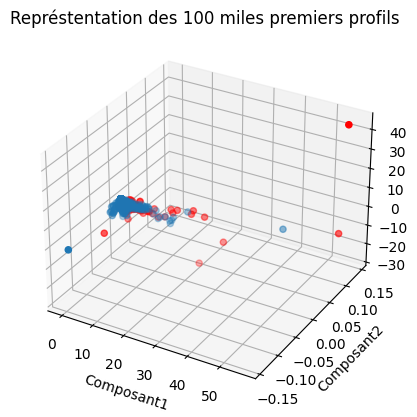

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
test = data_classified.iloc[:10001,:]
ax.scatter(test[test["label"] == 1]['Composant1'], test[test["label"] == 1]['Composant2'], test[test["label"] == 1]['Composant3'])
ax.scatter(test[test["label"] == -1]['Composant1'], test[test["label"] == -1]['Composant2'], test[test["label"] == -1]['Composant3'], color='red')
plt.title("Représtentation des 100 miles premiers profils")
ax.set_xlabel('Composant1')
ax.set_ylabel('Composant2')
ax.set_zlabel('Composant3')
plt.show()
